 # MTH8408 : Méthodes d'optimisation et contrôle optimal
 ## Laboratoire 2: Optimisation sans contraintes
Tangi Migot et Paul Raynaud

In [44]:
using Pkg
Pkg.activate("..") #Accède au fichier Project.toml
Pkg.add("LDLFactorizations")
Pkg.add("OptimizationProblems")
Pkg.instantiate()
Pkg.status()



  Activating project at `~/OneDrive/Documents/GitHub/MTH8408-Hiv24`
   Resolving package versions...


  No Changes to `~/OneDrive/Documents/GitHub/MTH8408-Hiv24/Project.toml`
  No Changes to `~/OneDrive/Documents/GitHub/MTH8408-Hiv24/Manifest.toml`


   Resolving package versions...


   Installed Crayons ───────────────────── v4.1.1
   Installed TableTraits ───────────────── v1.0.1
   Installed DataAPI ───────────────────── v1.16.0
   Installed Tables ────────────────────── v1.11.1
   Installed SentinelArrays ────────────── v1.4.1
   Installed PooledArrays ──────────────── v1.4.3
   Installed InlineStrings ─────────────── v1.4.0


   Installed IteratorInterfaceExtensions ─ v1.0.0
   Installed DataValueInterfaces ───────── v1.0.0


   Installed LaTeXStrings ──────────────── v1.3.1
   Installed InvertedIndices ───────────── v1.3.0


   Installed Missings ──────────────────── v1.1.0


   Installed StringManipulation ────────── v0.3.4


   Installed DataFrames ────────────────── v1.6.1


   Installed OptimizationProblems ──────── v0.5.0
   Installed SortingAlgorithms ─────────── v1.2.1


   Installed PrettyTables ──────────────── v2.3.1


   Installed Reexport ──────────────────── v1.2.2


    Updating `~/OneDrive/Documents/GitHub/MTH8408-Hiv24/Project.toml`
⌃ [5049e819] + OptimizationProblems v0.5.0
    Updating `~/OneDrive/Documents/GitHub/MTH8408-Hiv24/Manifest.toml`
  [a8cc5b0e] + Crayons v4.1.1
  [9a962f9c] + DataAPI v1.16.0
  [a93c6f00] + DataFrames v1.6.1
  [e2d170a0] + DataValueInterfaces v1.0.0
  [842dd82b] + InlineStrings v1.4.0
  [41ab1584] + InvertedIndices v1.3.0
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [b964fa9f] + LaTeXStrings v1.3.1
  [e1d29d7a] + Missings v1.1.0
⌃ [5049e819] + OptimizationProblems v0.5.0
  [2dfb63ee] + PooledArrays v1.4.3
  [08abe8d2] + PrettyTables v2.3.1
  [189a3867] + Reexport v1.2.2
  [91c51154] + SentinelArrays v1.4.1
  [a2af1166] + SortingAlgorithms v1.2.1
  [892a3eda] + StringManipulation v0.3.4
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.11.1
  [9fa8497b] + Future
        Info Packages marked with ⌃ have new versions available and may be upgradable.


Precompiling project...


  ✓ Reexport
  ✓ DataValueInterfaces
  ✓ IteratorInterfaceExtensions
  ✓ DataAPI


  ✓ LaTeXStrings
  ✓ InvertedIndices
  ✓ SortingAlgorithms


  ✓ TableTraits


  ✓ InlineStrings
  ✓ Missings
  ✓ PooledArrays


  ✓ Crayons


  ✓ SentinelArrays


  ✓ StringManipulation
  ✓ Tables


  ✓ PrettyTables


  ✓ DataFrames


  ✓ OptimizationProblems
  18 dependencies successfully precompiled in 27 seconds. 71 already precompiled.
  1 dependency had output during precompilation:
┌ OptimizationProblems
│  WARNING: method definition for #camshape#74 at /home/julien/.julia/packages/OptimizationProblems/nfPUU/src/PureJuMP/camshape.jl:13 declares type variable T but does not use it.
│  WARNING: method definition for #linsv#570 at /home/julien/.julia/packages/OptimizationProblems/nfPUU/src/PureJuMP/linsv.jl:3 declares type variable T but does not use it.
│  WARNING: method definition for #mgh01feas#576 at /home/julien/.julia/packages/OptimizationProblems/nfPUU/src/PureJuMP/mgh01feas.jl:3 declares type variable T but does not use it.
│  WARNING: method definition for #triangle#739 at /home/julien/.julia/packages/OptimizationProblems/nfPUU/src/PureJuMP/triangle.jl:11 declares type variable T but does not use it.
└  


Status `~/OneDrive/Documents/GitHub/MTH8408-Hiv24/Project.toml`
  [54578032] ADNLPModels v0.7.0
  [b6b21f68] Ipopt v1.6.0
  [4076af6c] JuMP v1.18.1
  [40e66cde] LDLFactorizations v0.10.1
⌃ [b8f27783] MathOptInterface v1.25.0
  [a4795742] NLPModels v0.20.0
  [f4238b75] NLPModelsIpopt v0.10.1
  [792afdf1] NLPModelsJuMP v0.12.5
⌃ [5049e819] OptimizationProblems v0.5.0
  [37e2e46d] LinearAlgebra
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [2]:
using ADNLPModels, LinearAlgebra, NLPModels, Printf

On pourra trouver de la documentation sur `ADNLPModels` et `NLPModels` ici:
- [juliasmoothoptimizers.github.io/NLPModels.jl/dev/](https://juliasmoothoptimizers.github.io/NLPModels.jl/dev/)
- [juliasmoothoptimizers.github.io/ADNLPModels.jl/dev/](https://juliasmoothoptimizers.github.io/ADNLPModels.jl/dev/)

In [3]:
# Problème test:
f(x) = x[1]^2 * (2*x[1] - 3) - 6*x[1]*x[2] * (x[1] - x[2] - 1) # fonction objectif vue en classe
g(x) = 6 * [x[1]^2 - x[1] - 2*x[1]*x[2] + x[2]^2 + x[2]; -x[1]^2 + 2*x[1]*x[2] + x[1]] # le gradient de f
H(x) = 6 * [2*x[1]-1-2*x[2] -2*x[1]+2*x[2]+1; -2*x[1]+2*x[2]+1 2*x[1]] # la Hessienne de f

H (generic function with 1 method)

### Exercice 1: Newton avec recherche linéaire - amélioration du code

Ci-dessous, vous avez le code de deux fonctions qui ont été vues dans le cours, la recherche linéaire qui satisfait Armijo, et une méthode de Newton avec cette recherche linéaire. Le but de ce laboratoire est d'implémenter d'autres méthodes utiles pour résoudre des problèmes de grandes dimensions.

In [4]:
#Amélioration possibles: return also the value of f

function armijo(xk, dk, fk, gk, f)
  slope = dot(gk, dk) #doit être <0
  t = 1.0
  while f(xk + t * dk) > fk + 1.0e-4 * t * slope
    t /= 1.5
  end
  return t
end

armijo (generic function with 1 method)

In [5]:
#Test pour vérifier que la fonction armijo fonctionne correctement.
using Test #le package Test définit (entre autre) la macro @test qui permet de faire des tests unitaires :-)
xk = ones(2) # [1,1]
gk = g(xk) # gradient
dk = - gk # direction is minus the gradient
fk = f(xk) # objective function evaluated at xk
t  = armijo(xk, dk, fk, gk, f) # armijo to find a t
@test t < 1
@test f(xk + t * dk) <= fk + 1.0e-4 * t * dot(gk,dk)

xk = [1.5, 0.5] 
fk = f(xk)
gk = g(xk)
dk = - gk
t  = armijo(xk, dk, fk, gk, f)
@test t < 1
@test f(xk + t * dk) <= f(xk) + 1.0e-4 * t * dot(g(xk),dk)


Test Passed

In [70]:

function newton_armijo(f, g, H, x0; verbose::Bool = true, epsilon_abs = 1.0e-6, epsilon_rel = 1.0e-6, max_iter::Int = 100)
  xk  = x0 # initialize xk at x0
  fk  = f(xk) # evaluate the objective function at xk
  gk = g(xk) # get gradient
  gnorm = gnorm0 = norm(gk) # get the norm of the gradient
  k = 0 # round 0
  verbose && @printf "%2s %9s %9s\n" "k" "fk" "||∇f(x)||"
  verbose && @printf "%2d %9.2e %9.1e\n" k fk gnorm
  while gnorm > epsilon_abs + epsilon_rel * gnorm0 && k < max_iter # while the stopping conditions is not met 
    Hk = H(xk) # get the hessian
    dk = - Hk \ gk # find the direction (just like inv(Hk)@gk)
    slope = dot(dk, gk) # slope= direction@gradient
    λ = 0.0
    while slope ≥ -1.0e-4 * norm(dk) * gnorm
      λ = max(1.0e-3, 10 * λ)
      dk = - ((Hk + λ * I ) \ gk)
      slope = dot(dk, gk)
    end
    t = armijo(xk, dk, fk, gk, f)
    xk += t * dk
    fk = f(xk)
    gk = g(xk)
    gnorm = norm(gk)
    k += 1
    verbose && @printf "%2d %9.2e %9.1e %7.1e \n" k fk gnorm t
  end
  return xk
end

newton_armijo (generic function with 1 method)

In [71]:
sol  = newton_armijo(f, g, H, [1.5, .5])
@test g(sol) ≈ zeros(2) atol = 1.0e-6

 k        fk ||∇f(x)||
 0  0.00e+00   4.5e+00
 1 -9.49e-01   8.4e-01 1.0e+00 
 2 -1.00e+00   7.6e-02 1.0e+00 
 3 -1.00e+00   9.1e-04 1.0e+00 
 4 -1.00e+00   1.4e-07 1.0e+00 


Test Passed

On veut améliorer le code de la fonction `newton_armijo` avec les ajouts suivants:
- Changer les paramètre d'entrées de la fonction pour un `nlp` -> DONE
- Avant d'appeler la recherche linéaire, si `slope = dot(dk, gk)` est plus grand que `-1.0e-4 * norm(dk) * gnorm`, on modifie le système. On fait maximum 5 mise à jour de `λ`, sinon on prend l'opposé du gradient.
```
    λ = 0.0
    while slope ≥ -1.0e-4 * norm(dk) * gnorm
      λ = max(1.0e-3, 10 * λ)
      dk = - ((Hk + λ * I ) \ gk)
      slope = dot(dk, gk)
    end
```
Ajouter un compteur sur le nombre de mises à jour de `λ` et ajuster `dk = - gk` si la limite est atteinte. -> DONE
- On veut aussi détecter et éventuellement arrêter la boucle `while` si la fonction objectif `fk` devient trop petite/négative (inférieure à `-1e15`), i.e. le problème est non-bornée inférieurement. -> DONE
- On veut ajouter deux critères d'arrêts supplémentaires: 
  - un compteur sur le nombre d'évaluations de f (maximum 1000). Utiliser `neval_obj(nlp)`. ->DONE
  -  une limite de temps d'execution, `max_time = 60.0`. Utiliser la fonction `time()`. -> DONE
- Enfin, on voudrait aussi voir un message à l'écran si l'algorithme n'a pas trouvé la solution, i.e. il s'est arrêté à cause de la limite sur le nombre d'itérations, temps, évaluation de fonctions, problème non-borné ->DONE

In [72]:
#SOLUTION: fonction à modifier
function newton_armijo_v2(nlp, x0; verbose::Bool = true, epsilon_abs = 1.0e-6, epsilon_rel = 1.0e-6, max_iter::Int = 100, max_lam::Int = 5, lower_bound = -1e15, max_eval::Int=1000, max_time = 60.0)
  start_time = time()
  xk  = x0 # initialize xk at x0
  fk  = obj(nlp, xk) # evaluate the objective function at xk
  gk = grad(nlp, xk) # get gradient
  gnorm = gnorm0 = norm(gk) # get the norm of the gradient
  k = 0 # round 0
  error = false
  
  verbose && @printf "%2s %9s %9s\n" "k" "fk" "||∇f(x)||"
  verbose && @printf "%2d %9.2e %9.1e\n" k fk gnorm
  while gnorm > epsilon_abs + epsilon_rel * gnorm0   # while the stopping conditions is not met 
    Hk = hess(nlp, xk) # get the hessian
    dk = - Hk \ gk # find the direction (just like inv(Hk)@gk)
    slope = dot(dk, gk) # slope= direction@gradient
    λ = 0.0
    lam_counter = 0
    while slope ≥ -1.0e-4 * norm(dk) * gnorm && lam_counter < max_lam # ADDED lam_counter
      λ = max(1.0e-3, 10 * λ)
      dk = - ((Hk + λ * I ) \ gk)
      slope = dot(dk, gk)
      lam_counter += 1
      if lam_counter == 5
        dk = -gk
      end
    end
    t = armijo(xk, dk, fk, gk, f)
    xk += t * dk
    fk = obj(nlp, xk)
    gk =  grad(nlp, xk)
    gnorm = norm(gk)
    k += 1

    # prints
    if fk <= lower_bound
      xk = -Inf64
      @printf "The problem is unbounded below."
      error = true
      break
    elseif k > max_iter
      @printf "Maximal number of iterations has been reached"
      error = true
      break
    elseif (time() - start_time) >= max_time
      @printf "Timeout has been reached"
      error = true
      break
    
    elseif neval_obj(nlp) > max_eval
      @printf "Max number of evaluations has been reached"
      error = true
      break
    end
    verbose && @printf "%2d %9.2e %9.1e %7.1e \n" k fk gnorm t
  end
  if error == false
    println("An optimal solution has been found in $(time() - start_time) seconds")
  else
    println("An error occured during solving")
  end
  return xk, obj(nlp, xk)
end


newton_armijo_v2 (generic function with 1 method)

In [76]:
#Test
f(x) = x[1]^2 * (2*x[1] - 3) - 6*x[1]*x[2] * (x[1] - x[2] - 1) # fonction objectif vue en classe
x0 = zeros(2)
x0[1] = 1.5
x0[2] = 0.5

nlp = ADNLPModel(f, x0)

arg, star = newton_armijo_v2(nlp, x0)

print("argmin est $arg \n")
println("On trouve une fonction objectif de $star ")

 k        fk ||∇f(x)||
 0  0.00e+00   4.5e+00


 1 -9.49e-01   8.4e-01 1.0e+00 
 2 -1.00e+00   7.6e-02 1.0e+00 
 3 -1.00e+00   9.1e-04 1.0e+00 
 4 -1.00e+00   1.4e-07 1.0e+00 
An optimal solution has been found in 0.05222201347351074 seconds
argmin est [1.0000000232305737, 2.3230573680167342e-8] 
On trouve une fonction objectif de -0.9999999999999983 


### Exercice 2: LDLt-Newton avec recherche linéaire

On va maintenant modifier la méthode de Newton vu précédemment pour utiliser un package qui s'occupe de calculer une factorisation de la matrice hessienne tel que:
$$
\nabla^2 f(x) = LDL^T.
$$
Ce type de factorisation n'est possible que si la matrice hessienne est définie positive, dans le cas contraire on a besoin de régularisé le système comme dans l'exercice précédent.

Pour résoudre le système linéaire en utilisant cette factorisation, on va utiliser le package [`LDLFactorizations`](https://github.com/JuliaSmoothOptimizers/LDLFactorizations.jl):

In [10]:
using LDLFactorizations, LinearAlgebra

Un tutoriel sur l'utilisation de `LDLFactorizations` est disponible sur la documentation du package sur github ou encore [à ce lien](https://juliasmoothoptimizers.github.io/LDLFactorizations.jl/dev/tutorial/).

Voici un exemple d'utilisation de ce package. La matrice dont on veut calculer la factorisation doit être de type `Symmetric`.

In [11]:
A = ones(2,2) #cette matrice symétrique, mais pas du type Symmetric
              #à noter que cette matrice n'est pas définie positive.
typeof(A) <: Symmetric #false
A = Symmetric(A)
typeof(A) <: Symmetric #true :)
display(A)

2×2 Symmetric{Float64, Matrix{Float64}}:
 1.0  1.0
 1.0  1.0

Deuxième étape, le package fait une phase d'analyse de la matrice avec `ldl_analyze` en créant une structure pratique pour les diverses fonctions du package.

In [12]:
A = -rand(2, 2)
sol = rand(2)
b = A*sol #on veut résoudre le système A*x=b
display(A)
# LDLFactorizations va en réalité demander la matrice triangulaire supérieure
A = Symmetric(triu(A), :U)
display(A)

S = ldl_analyze(A)
display(S)

ldl_factorize!(A, S)
display(S)
x = S \ b # x = A \b ça va être résolu par Julia 
norm(A * x - b)

2×2 Matrix{Float64}:
 -0.619639  -0.45583
 -0.457736  -0.884584

2×2 Symmetric{Float64, Matrix{Float64}}:
 -0.619639  -0.45583
 -0.45583   -0.884584

LDLFactorizations.LDLFactorization{Float64, Int64, Int64, Int64}(true, false, true, 2, [2, -1], [1, 0], [2, 2], [1, 2], [1, 2], [1, 2, 2], [1, 1, 1], Int64[], [143753118144], [7.10234771575e-313], [6.95011080438436e-310, 6.95011080438436e-310], [6.95011525504944e-310, 6.950115255051e-310], [29, 28], 0.0, 0.0, 0.0, 2)

LDLFactorizations.LDLFactorization{Float64, Int64, Int64, Int64}(true, true, true, 2, [2, -1], [1, 0], [2, 2], [1, 2], [1, 2], [1, 2, 2], [1, 1, 1], Int64[], [2], [0.7356380357070216], [-0.6196385918303116, -0.5492582204275163], [0.0, 0.0], [1, 1], 0.0, 0.0, 0.0, 2)

1.1102230246251565e-16

In [13]:
A = [0. 1.; 1. 0.]

2×2 Matrix{Float64}:
 0.0  1.0
 1.0  0.0

In [14]:
A = Symmetric(triu(A), :U)
display(A)
S = ldl_analyze(A)
ldl_factorize!(A, S)

2×2 Symmetric{Float64, Matrix{Float64}}:
 0.0  1.0
 1.0  0.0

LDLFactorizations.LDLFactorization{Float64, Int64, Int64, Int64}(true, false, true, 2, [2, -1], [0, 0], [1, 2], [1, 2], [1, 2], [1, 2, 2], [1, 1, 1], Int64[], [433688377733], [6.95011415094315e-310], [0.0, 0.0], [0.0, 0.0], [140669057858864, 140671963127984], 0.0, 0.0, 0.0, 2)

In [15]:
S.L

2×2 SparseArrays.SparseMatrixCSC{Float64, Int64} with 1 stored entry:
  ⋅    ⋅ 
  ⋅    ⋅ 

La matrice `A` factorisée par $LDL^T$ n'était pas forcément définie positive. On peut le voir sur les valeurs de $D$.

In [16]:
S.d #c'est le vecteur qui correspond à la matrice diagonale D.

2-element Vector{Float64}:
 0.0
 0.0

Pour l'optimisation, dans le cas où des valeurs de $D$ sont négatives, i.e. `minimum(S.d) <= 0.`, on ajoutera une correction pour être sûr d'obtenir une direction de descente. On pourra choisir un des deux:
- `S.d   = abs.(S.d)`
- `S.d .+= -minimum(S.d) + 1e-6`

#### Utiliser cette technique pour calculer la direction de descente:

In [78]:
# Solution: modifier le calcul de la direction avec LDLFactorizations
function newton_ldlt_armijo(nlp, x0, verbose::Bool = true)
  xk  = x0
  fk  = obj(nlp, xk)
  gk = grad(nlp, xk)
  gnorm = gnorm0 = norm(gk)
  k = 0
  verbose && @printf "%2s %9s %9s\n" "k" "fk" "||∇f(x)||"
  verbose && @printf "%2d %9.2e %9.1e\n" k fk gnorm
  while gnorm > 1.0e-6 + 1.0e-6 * gnorm0 && k < 100 && fk > -1e15
    Hk = Symmetric(triu(hess(nlp, xk)), :U)
    # ... TODO ...
    Sk = ldl_analyze(Hk) # added
    ldl_factorize!(Hk, Sk) # added
    Sk.d = abs.(Sk.d) # added
    dk = - Sk \ gk
    slope = dot(dk, gk)
    t = armijo(xk, dk, fk, gk, x -> obj(nlp, x))
    xk += t * dk
    fk = obj(nlp, xk)
    gk = grad(nlp, xk)
    gnorm = norm(gk)
    k += 1
    verbose && @printf "%2d %9.2e %9.1e %7.1e \n" k fk gnorm t
  end
  return xk, obj(nlp, xk)
end


newton_ldlt_armijo (generic function with 1 method)

In [80]:
#Test
f(x) = x[1]^2 * (2*x[1] - 3) - 6*x[1]*x[2] * (x[1] - x[2] - 1)
x0 = zeros(2)
x0[1] = 1.5
x0[2] = 0.5
nlp = ADNLPModel(f, x0)


arg, star = newton_ldlt_armijo(nlp, x0)

print("argmin est $arg \n")
println("On trouve une fonction objectif de $star ")

 k        fk ||∇f(x)||
 0  0.00e+00   4.5e+00


 1 -9.49e-01   8.4e-01 1.0e+00 
 2 -1.00e+00   7.6e-02 1.0e+00 
 3 -1.00e+00   9.1e-04 1.0e+00 
 4 -1.00e+00   1.4e-07 1.0e+00 
argmin est [1.0000000232305737, 2.3230573678432618e-8] 
On trouve une fonction objectif de -0.9999999999999983 


### Exercice 3: Méthode quasi-Newton: BFGS

#### Méthode quasi-Newton: BFGS
Pour des problèmes de très grandes tailles, il est parfois très coûteux d'évaluer la hessienne du problème d'optimisation (et même le produit hessienne-vecteur). La famille des méthode *quasi-Newton* construit une approximation $B_k$ symétrique de la matrice Hessienne en utilisant seulement le gradient et en mesurant sa variation, et permet quand même d'améliorer significativement les performances comparé à la méthode du gradient.
$$
s_k = x_{k+1} - x_k, \quad y_k = \nabla f(x_{k+1}) - \nabla f(x_k).
$$
Par ailleurs la matrice $B_k$ est aussi construite de façon à ce que l'inverse soit connue, il n'y a donc pas de système linéaire à résoudre.

La méthode la plus connue dans la famille des méthodes quasi-Newton, est la méthode BFGS (Broyden - Fletcher, Goldfarb, and Shanno) où $B_k$ est définir positive ($B_0 = \lambda I, \;\lambda > 0$).
La formule suivante calcule l'inverse de $B_k$ que l'on note $H_k$:
$$
H_{k+1} = (I - \rho_k s_ky_k^T)H_k(I-\rho_ky_ks_k^T) + \rho_ks_ks_k^T, \quad \rho_k = \frac{1}{y_k^Ts_k}.
$$
L'algorithme est presque le même que la méthode de Newton à la différence qu'il n'y a pas de système linéaire à résoudre et la direction $d_k$ est à coup sûr une direction de descente. Ainsi la direction de descente est calculée comme suit:
$$
d_k = - H_k \nabla f(x_k).
$$

Comment choisir la matrice $H_0$? On peut éventuellement choisir $I$. Une alternative est d'utiliser $H_0=I$ pour la première itération et ensuite mettre $H_0$ à jour avant de calculer $H_1$ en utilisant:
$$
H_0 = \frac{y_k^Ts_k}{y_k^Ty_k}I.
$$

**Important**: pour s'assurer que la matrice $H_k$ reste définie positive à toutes les itérations, il faut s'assurer que $y_k^Ts_k>0$. C'est toujours vrai pour des fonctions convexes, mais pas nécessairement dans le cas général. On pourra tester ici la version "skip" qui ne mets pas à jour quand cette condition n'est pas vérifiée.

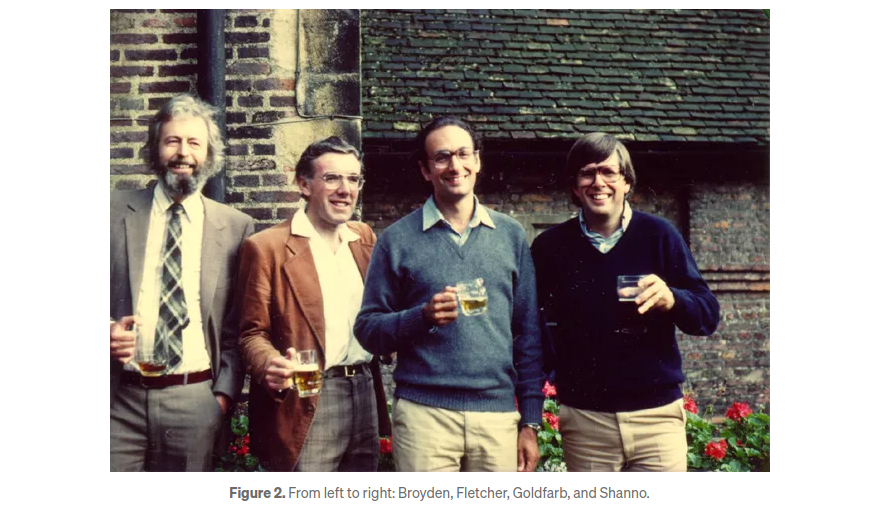

In [19]:
"""
This function aims to compute the next H matrix in the BFGS method.
Inputs:, sk, yk and Hk
Outputs: H_{k+1}
"""
function nextH(sk, yk, Hk)
    pk = 1 ./(transpose(yk)*sk)
    return (I-pk.*sk*transpose(yk))*Hk*(I-pk.*yk*transpose(sk)) + pk.*sk*transpose(sk)

end


"""Here are some tests"""

a = ones((2,1))
b = ones((2,1))
b[1,1] = b[1,1]* 4 

display(a)

display(transpose(b))

display(b)

c = 1 ./(transpose(b)*a)
temp = I-c.* a*transpose(b)
display(temp)

display(nextH(a,b,I))

2×1 Matrix{Float64}:
 1.0
 1.0

1×2 transpose(::Matrix{Float64}) with eltype Float64:
 4.0  1.0

2×1 Matrix{Float64}:
 4.0
 1.0

2×2 Matrix{Float64}:
  0.2  -0.2
 -0.8   0.8

2×2 Matrix{Float64}:
  0.28  -0.12
 -0.12   1.48

In [105]:
# Solution: copier-coller votre newton_armijo ici et modifier le calcul de la direction avec la méthode de BFGS inverse skip.
"""
Q1 : How do we initialize yk and sk without x_{k+1} ???
Q2 : Is it supposed to be H_1 = (yk.T sk / (yk.T yk)) * I
"""
function bfgs_quasi_newton_armijo(nlp, x0, verbose::Bool = true, epsilon_abs = 1.0e-6, epsilon_rel = 1.0e-6, max_iter::Int = 100, max_lam::Int = 5, lower_bound = -1e15, max_eval::Int=1000, max_time = 60.0)
  start_time = time()
  xk  = x0 # initialize xk at x0
  fk  = obj(nlp, xk) # evaluate the objective function at xk
  gk = grad(nlp, xk) # get gradient
  gnorm = gnorm0 = norm(gk) # get the norm of the gradient
  k = 0 # round 0
  Hk = I
  error = false
  
  verbose && @printf "%2s %9s %9s\n" "k" "fk" "||∇f(x)||"
  verbose && @printf "%2d %9.2e %9.1e\n" k fk gnorm
  while gnorm > epsilon_abs + epsilon_rel * gnorm0 && (time() - start_time) <= max_time  # while the stopping conditions is not met 
    dk = - Hk * gk 
    slope = dot(dk, gk) # slope= direction@gradient
    λ = 0.0
    lam_counter = 0
    while slope ≥ -1.0e-4 * norm(dk) * gnorm && lam_counter < max_lam  # ADDED lam_counter
      λ = max(1.0e-3, 10 * λ)
      dk = - ((Hk + λ * I ) \ gk)
      slope = dot(dk, gk)
      lam_counter += 1
      if lam_counter == 5
        dk = -gk
      end
    end
    t = armijo(xk, dk, fk, gk, f)
    last_x = xk
    last_g = gk
    xk += t * dk
    fk = obj(nlp, xk)
    gk =  grad(nlp, xk)
    gnorm = norm(gk)
    sk = xk - last_x
    yk = gk - last_g
    if k == 0
      Hk = transpose(yk)*sk ./ (transpose(yk)*yk) *I
    end
    Hk = nextH(sk, yk, Hk)
    k += 1

    # prints
    if fk <= lower_bound
      xk = -Inf64
      @printf "The problem is unbounded below. \n"
      error = true
      break
    elseif k > max_iter
      @printf "Maximal number of iterations has been reached \n"
      error = true
      break
    elseif (time() - start_time) >= max_time
      @printf "Timeout has been reached"
      error = true
      break
    
    elseif neval_obj(nlp) > max_eval
      @printf "Max number of evaluations has been reached \n"
      error = true
      break
    end
    verbose && @printf "%2d %9.2e %9.1e %7.1e \n" k fk gnorm t
  end
  if error == false
    println("An optimal solution has been found in $(time() - start_time) seconds")
  else
    println("An error occured during solving")
  end
  return xk, obj(nlp, xk)
end


bfgs_quasi_newton_armijo

In [99]:
#Test
f(x) = x[1]^2 * (2*x[1] - 3) - 6*x[1]*x[2] * (x[1] - x[2] - 1)
x0 = zeros(2)
x0[1] = 1.5
x0[2] = 0.5
nlp = ADNLPModel(f, x0)

arg, star = bfgs_quasi_newton_armijo(nlp, x0)
print("argmin est $arg \n")
println("On trouve une fonction objectif de $star ")

 k        fk ||∇f(x)||
 0  0.00e+00   4.5e+00
 1 -3.73e-01   4.2e+00 8.8e-02 
 2 -7.22e-01   1.4e+00 1.0e+00 
 3 -8.44e-01   9.3e-01 1.0e+00 
 4 -9.83e-01   4.6e-01 1.0e+00 
 5 -9.98e-01   2.3e-01 1.0e+00 
 6 -1.00e+00   7.9e-02 1.0e+00 
 7 -1.00e+00   1.3e-02 1.0e+00 
 8 -1.00e+00   9.1e-04 1.0e+00 
 9 -1.00e+00   1.3e-04 1.0e+00 
10 -1.00e+00   6.7e-06 1.0e+00 
11 -1.00e+00   1.1e-07 1.0e+00 
An optimal solution has been found in 0.03559303283691406 seconds
argmin est [1.0000000149131603, 1.5213298824643154e-9] 
On trouve une fonction objectif de -0.9999999999999994 


### Exercice 4: application à un problème de grande taille

On va ajouter le package `OptimizationProblems` qui contient, comme son nom l'indique, une collection de problème d'optimisation disponible au format de `JuMP` (dans le sous-module `OptimizationProblems.PureJuMP`) et de `ADNLPModel` (dans le sous-module `OptimizationProblems.ADNLPProblems`).

In [84]:
using ADNLPModels, OptimizationProblems.ADNLPProblems, Random # Attention si vous ne faites pas using ADNLPModels avant ça ne fonctionne pas!

In [91]:
n = 500
model = genrose(n=n)
@test typeof(model) <: ADNLPModel

Test Passed

Si vous le souhaitez, il est possible d'accéder à certaines informations sur le problème en accédant à son meta:

In [92]:
using OptimizationProblems
OptimizationProblems.genrose_meta

Dict{Symbol, Any} with 17 entries:
  :has_equalities_only    => false
  :origin                 => :unknown
  :has_inequalities_only  => false
  :defined_everywhere     => missing
  :has_fixed_variables    => false
  :variable_ncon          => false
  :nvar                   => 100
  :is_feasible            => true
  :minimize               => true
  :ncon                   => 0
  :name                   => "genrose"
  :best_known_lower_bound => -Inf
  :objtype                => :other
  :best_known_upper_bound => 405.106
  :has_bounds             => false
  :variable_nvar          => true
  :contype                => :unconstrained

Il est aussi possible d'accéder au meta de tous les problèmes

In [93]:
OptimizationProblems.meta

261×17 DataFrame
 Row │ nvar   variable_nvar  ncon   variable_ncon  minimize  name              ⋯
     │ Int64  Bool           Int64  Bool           Bool      String            ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1          false      0          false      true  AMPGO02           ⋯
   2 │     1          false      0          false      true  AMPGO03
   3 │     1          false      0          false      true  AMPGO04
   4 │     1          false      0          false      true  AMPGO05
   5 │     1          false      0          false      true  AMPGO06           ⋯
   6 │     1          false      0          false      true  AMPGO07
   7 │     1          false      0          false      true  AMPGO08
   8 │     1          false      0          false      true  AMPGO09
  ⋮  │   ⋮          ⋮          ⋮          ⋮           ⋮             ⋮          ⋱
 255 │  2244          false   1896          false      true  triangle_deer     ⋯
 256 │  1366          false   1182          false      true  triangle_pacman
 257 │  4444          false   4025          false      true  triangle_turtle
 258 │   100           true      0          false      true  tridia
 259 │   100           true      0          false      true  vardim            ⋯
 260 │   100           true      0          false      true  woods
 261 │     3          false      3          false      true  zangwil3
                                                 11 columns and 246 rows omitted

Résoudre le problème `genrose` et un autre problème de la collection en utilisant vos algorithmes précédents.
Avant d'utiliser l'algorithme on testera que le problème est bien sans contrainte avec:

In [106]:
n = 500
nlp = genrose(n = n)
unconstrained(nlp) #qui retourne vrai si `nlp` est un problème sans contraintes.
v = Vector{Float64}(undef,n)
x0 = rand!(v,-10:10)

# Use previous functions to solve genrose.
println("Genrose (Newton Armijo):")
arg1, star1 = newton_armijo_v2(nlp, x0)
print("argmin est $arg1 \n")
println("On trouve une fonction objectif de $star1 ")


println("Genrose (LDLT Armijo):")
arg2, star2 = newton_ldlt_armijo(nlp, x0)
print("argmin est $arg2 \n")
println("On trouve une fonction objectif de $star2 ")

println("Genrose (Quasi Newton Armijo):")
arg3, star3 = bfgs_quasi_newton_armijo(nlp, x0)
print("argmin est $arg3 \n")
println("On trouve une fonction objectif de $star3 ")

Genrose (Newton Armijo):
 k        fk ||∇f(x)||
 0  1.26e+08   4.0e+06


 1  4.93e+09   2.0e+08 1.0e+00 
 2  8.35e+13   3.5e+11 1.0e+00 


 3  2.03e+13   1.1e+11 1.0e+00 
 4  4.00e+12   3.2e+10 1.0e+00 


 5  7.91e+11   9.6e+09 1.0e+00 
 6  1.58e+11   2.8e+09 1.0e+00 


 7  3.12e+10   8.4e+08 1.0e+00 
 8  1.03e+12   1.2e+10 1.0e+00 


 9  1.57e+13   9.5e+10 1.0e+00 
10  2.06e+13   1.1e+11 1.0e+00 


11  4.09e+13   1.9e+11 1.0e+00 
12  8.07e+12   5.7e+10 1.0e+00 


13  3.89e+12   2.9e+10 1.0e+00 
14  9.57e+13   3.7e+11 1.0e+00 


15  2.12e+13   1.1e+11 1.0e+00 
16  2.68e+14   6.9e+11 1.0e+00 


17  1.47e+16   1.5e+13 1.0e+00 
18  8.45e+16   5.1e+13 1.0e+00 


19  4.10e+18   1.1e+15 1.0e+00 
20  2.06e+19   3.1e+15 1.0e+00 


21  6.13e+18   1.0e+15 1.0e+00 
22  2.14e+18   4.1e+14 1.0e+00 


23  1.75e+18   3.7e+14 1.0e+00 
24  1.45e+18   3.2e+14 1.0e+00 


25  1.44e+18   3.2e+14 1.0e+00 
26  1.06e+18   2.6e+14 1.0e+00 


27  4.76e+17   1.7e+14 1.0e+00 
28  6.52e+23   9.0e+18 1.0e+00 


29  1.29e+23   2.7e+18 1.0e+00 
30  2.54e+22   7.9e+17 1.0e+00 


31  5.03e+21   2.4e+17 1.0e+00 
32  1.02e+21   7.0e+16 1.0e+00 


33  2.56e+20   2.2e+16 1.0e+00 
34  5.05e+19   6.5e+15 1.0e+00 


35  9.98e+18   1.9e+15 1.0e+00 
36  1.97e+18   5.7e+14 1.0e+00 


37  3.89e+17   1.7e+14 1.0e+00 
38  7.69e+16   5.0e+13 1.0e+00 


39  1.52e+16   1.5e+13 1.0e+00 
40  3.00e+15   4.4e+12 1.0e+00 


41  7.84e+14   1.5e+12 1.0e+00 
42  1.34e+16   1.6e+13 1.0e+00 


43  1.57e+17   8.3e+13 1.0e+00 
44  1.98e+17   1.1e+14 1.0e+00 


45  4.15e+17   1.8e+14 1.0e+00 
46  3.41e+17   1.5e+14 1.0e+00 


47  2.11e+17   9.5e+13 1.0e+00 
48  4.18e+16   2.8e+13 1.0e+00 


49  8.37e+15   8.3e+12 1.0e+00 
50  1.66e+15   2.5e+12 1.0e+00 


51  3.85e+14   7.8e+11 1.0e+00 
52  8.02e+14   1.9e+12 1.0e+00 


53  1.50e+13   6.8e+10 1.0e+00 
54  2.97e+12   2.0e+10 1.0e+00 


55  5.86e+11   6.0e+09 1.0e+00 
56  1.16e+11   1.8e+09 1.0e+00 


57  2.29e+10   5.3e+08 1.0e+00 
58  4.55e+09   4.5e+08 1.0e+00 


59  8.95e+08   4.6e+07 1.0e+00 
60  1.79e+08   1.4e+07 1.0e+00 


61  3.79e+07   4.1e+06 1.0e+00 
62  1.00e+07   1.2e+06 1.0e+00 


63  4.53e+06   3.6e+05 1.0e+00 
64  3.44e+06   1.2e+05 1.0e+00 


65  3.29e+06   7.7e+04 1.0e+00 
66  1.08e+07   1.2e+06 1.0e+00 


67  7.12e+09   3.0e+08 1.0e+00 
68  1.56e+09   9.1e+07 1.0e+00 


69  3.11e+08   2.7e+07 1.0e+00 
70  2.14e+08   1.8e+07 1.0e+00 


71  4.51e+07   5.3e+06 1.0e+00 
72  1.14e+07   1.6e+06 1.0e+00 


73  2.61e+07   3.7e+06 1.0e+00 
74  7.70e+06   1.1e+06 1.0e+00 


75  4.07e+06   3.2e+05 1.0e+00 
76  3.35e+06   1.1e+05 1.0e+00 


77  3.48e+06   1.6e+05 1.0e+00 
78  3.24e+06   7.0e+04 1.0e+00 


79  3.18e+06   5.7e+04 1.0e+00 
80  3.17e+06   5.6e+04 1.0e+00 


81  3.17e+06   1.4e+03 1.0e+00 
82  1.58e+18   4.8e+14 1.0e+00 


83  6.73e+31   9.4e+24 6.0e-08 
84  6.87e+44   5.4e+34 5.5e-15 


85  6.35e+57   2.8e+44 1.7e-21 
86  2.20e+71   4.1e+54 7.6e-28 


87  3.12e+84   3.0e+64 1.0e-34 
88  7.66e+97   3.3e+74 3.2e-41 


89 1.95e+111   3.7e+84 6.4e-48 
90 5.55e+124   4.6e+94 1.3e-54 


91 4.31e+137  2.1e+104 1.8e-61 
92 8.86e+150  2.1e+114 8.1e-68 


93 1.32e+164  1.6e+124 1.7e-74 
94 3.80e+177  1.9e+134 5.0e-81 


95 3.06e+190  9.3e+143 6.8e-88 
96 7.06e+203  9.7e+153 3.1e-94 


97 1.48e+217  9.5e+163 6.4e-101 
98 1.48e+217  9.5e+163 1.7e-320 


99 1.48e+217  9.5e+163 1.7e-320 
100 1.48e+217  9.5e+163 1.7e-320 


Maximal number of iterations has been reachedAn error occured during solving
argmin est [-0.9932476436295867, 0.9965748727812204, 0.9981785307402842, 0.9988643583281877, 0.9989777293840476, 0.9985758660559529, 0.9974566675720281, 0.9950585546891616, 0.9901850559855525, 0.9804334305049831, 0.961111586159281, 0.9233776770564808, 0.8517037140307273, 0.7228921205832713, 0.515673500523966, 0.24829485293533476, 0.01941762210387352, -0.2455437684910633, 0.4180009334727892, 0.6070498818776134, 0.6684894894701711, 0.6164725334403576, 0.44451397388570274, 0.14924038099479336, -0.1896520533265128, -0.3294371439742823, -0.14167254452400024, -0.0021873535632907296, 0.0052241945209365506, 0.004759317672774664, -0.3538436962767851, 0.6418337495437194, 0.811494494538864, 0.9034570068162329, 0.95122819416738, 0.9755292582256674, 0.9877638520401858, 0.9938919261262038, 0.9969535361405268, 0.9984811863933446, 0.9992429552000086, 0.9996226944792641, 0.9998119635457211, 0.9999062913585806, 0.99995330056823

 k        fk ||∇f(x)||
 0  1.26e+08   4.0e+06


 1  1.20e+08   5.8e+06 3.0e-01 
 2  1.07e+08   6.3e+06 3.0e-01 


 3  1.05e+08   6.1e+06 2.6e-02 
 4  3.96e+07   3.6e+06 1.0e+00 


 5  2.68e+07   2.7e+06 4.4e-01 
 6  5.28e+06   8.0e+05 1.0e+00 


 7  5.12e+06   7.7e+05 5.9e-02 
 8  1.02e+06   2.3e+05 1.0e+00 


 9  5.05e+05   1.8e+05 1.0e+00 
10  4.92e+05   1.7e+05 2.6e-02 


11  4.64e+05   1.6e+05 8.8e-02 
12  9.72e+04   4.7e+04 1.0e+00 


13  9.21e+04   4.4e+04 5.9e-02 
14  2.15e+04   1.3e+04 1.0e+00 


15  2.04e+04   1.2e+04 5.9e-02 
16  1.78e+04   9.6e+03 4.4e-01 


17  1.77e+04   9.6e+03 3.0e-04 
18  1.75e+04   9.6e+03 7.7e-03 


19  1.74e+04   9.2e+03 1.3e-01 
20  1.71e+04   9.1e+03 7.7e-03 


21  1.21e+04   6.5e+03 6.7e-01 
22  1.17e+04   6.3e+03 3.9e-02 


23  1.12e+04   5.9e+03 8.8e-02 
24  1.03e+04   7.0e+03 6.7e-01 


25  9.98e+03   6.8e+03 2.6e-02 
26  9.62e+03   6.6e+03 3.9e-02 


27  9.43e+03   6.4e+03 2.6e-02 
28  9.40e+03   6.4e+03 1.5e-03 


29  7.50e+03   4.9e+03 3.0e-01 
30  7.48e+03   4.9e+03 7.7e-03 


31  4.94e+03   3.6e+03 1.0e+00 
32  4.94e+03   3.6e+03 1.5e-03 


33  4.89e+03   3.6e+03 1.2e-02 
34  4.80e+03   3.5e+03 3.9e-02 


35  3.17e+03   2.3e+03 6.7e-01 
36  3.10e+03   2.2e+03 2.6e-02 


37  1.95e+03   1.3e+03 6.7e-01 
38  1.80e+03   1.2e+03 3.0e-01 


39  1.73e+03   1.2e+03 8.8e-02 
40  1.69e+03   1.2e+03 4.5e-04 


41  1.05e+03   5.2e+02 1.0e+00 
42  1.02e+03   4.9e+02 8.8e-02 


43  9.83e+02   4.5e+02 1.3e-01 
44  8.62e+02   3.5e+02 1.0e+00 


45  8.25e+02   3.8e+02 4.4e-01 
46  8.25e+02   3.8e+02 1.2e-02 


47  7.72e+02   2.5e+02 6.7e-01 
48  7.62e+02   2.5e+02 8.8e-02 


49  7.20e+02   2.3e+02 1.0e+00 
50  7.13e+02   2.6e+02 5.9e-02 


51  6.73e+02   2.0e+02 6.7e-01 
52  6.71e+02   2.0e+02 2.6e-02 


53  6.60e+02   1.8e+02 4.4e-01 
54  6.55e+02   1.6e+02 2.0e-01 


55  6.31e+02   6.4e+01 1.0e+00 
56  6.28e+02   6.8e+01 1.3e-01 


57  6.27e+02   6.9e+01 1.2e-02 
58  6.25e+02   6.5e+01 1.3e-01 


59  6.25e+02   6.5e+01 4.5e-04 
60  6.24e+02   6.4e+01 2.0e-01 


61  6.23e+02   6.6e+01 1.7e-02 
62  6.23e+02   5.9e+01 3.9e-02 


63  6.20e+02   4.8e+01 1.3e-01 
64  6.19e+02   5.0e+01 7.8e-06 


65  6.14e+02   6.2e+01 1.0e+00 
66  6.08e+02   1.1e+02 7.7e-03 


67  6.06e+02   1.1e+02 3.9e-02 
68  5.98e+02   1.4e+02 2.0e-01 


69  5.77e+02   1.8e+02 1.3e-01 
70  5.52e+02   1.1e+02 4.4e-01 


71  5.50e+02   1.1e+02 3.9e-02 
72  5.47e+02   1.1e+02 1.0e+00 


73  5.45e+02   9.4e+01 1.7e-02 
74  5.44e+02   9.0e+01 3.9e-02 


75  5.32e+02   4.8e+01 1.0e+00 
76  5.31e+02   5.2e+01 8.8e-02 


77  5.30e+02   5.5e+01 1.2e-02 
78  5.27e+02   5.4e+01 1.3e-01 


79  5.24e+02   4.2e+01 4.4e-01 
80  5.24e+02   4.4e+01 5.9e-02 


81  5.22e+02   4.0e+01 1.3e-01 
82  5.21e+02   3.3e+01 2.0e-01 


83  5.20e+02   4.1e+01 8.8e-02 
84  5.19e+02   3.7e+01 8.8e-02 


85  5.18e+02   4.1e+01 1.3e-01 
86  5.16e+02   4.8e+01 3.0e-01 


87  5.14e+02   5.1e+01 3.0e-01 
88  5.13e+02   4.5e+01 1.7e-02 


89  5.08e+02   3.1e+01 6.7e-01 
90  5.08e+02   4.5e+01 1.3e-01 


91  5.02e+02   2.1e+01 1.0e+00 
92  5.02e+02   3.5e+01 2.6e-02 


93  5.01e+02   3.3e+01 2.6e-02 
94  5.01e+02   3.2e+01 1.3e-01 


95  5.00e+02   3.4e+01 2.6e-02 
96  5.00e+02   4.9e+01 2.0e-01 


97  5.00e+02   5.2e+01 3.9e-02 
98  4.94e+02   3.6e+01 6.7e-01 


99  4.92e+02   3.9e+01 8.8e-02 
100  4.92e+02   4.1e+01 1.7e-02 


argmin est [0.9999796683817512, 0.9999592344674331, 0.9999182117188721, 0.9998358768769411, 0.9996706236112618, 0.9993388895941446, 0.9986727103910709, 0.9973339129847948, 0.9946394531666607, 0.9892014443679198, 0.9781712618201146, 0.9556180470985923, 0.9091147710483631, 0.8137534880832553, 0.6308561905136973, 0.3496001230541381, 0.09636682594318584, 0.016483882334221593, 0.010364274899925363, 0.010211655107051576, 0.010208490494550642, 0.01020842520940075, 0.01020842386272761, 0.010208423834949094, 0.010208423834376092, 0.010208423834364272, 0.010208423834364027, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423834364022, 0.010208423


Genrose (Quasi Newton Armijo):
 k        fk ||∇f(x)||
 0  1.26e+08   4.0e+06
 1  4.53e+15   2.3e+12 2.3e-03 
 2  1.26e+08   4.0e+06 1.0e+00 
 3  1.26e+08   4.0e+06 1.0e+00 
 4  2.83e+07   1.3e+06 1.0e+00 
 5  1.29e+07   7.5e+05 1.0e+00 
 6  5.54e+06   4.1e+05 1.0e+00 
 7  3.07e+06   2.8e+05 1.0e+00 
 8  1.98e+06   2.0e+05 1.0e+00 
 9  1.45e+06   1.6e+05 1.0e+00 
10  1.22e+06   1.4e+05 1.0e+00 
11  1.22e+06   1.3e+05 1.0e+00 
12  1.22e+06   1.3e+05 1.0e+00 
13  1.22e+06   1.3e+05 1.0e+00 
14  9.45e+05   1.0e+05 1.0e+00 
15  6.74e+05   7.6e+04 1.0e+00 
16  2.98e+05   3.9e+04 1.0e+00 
17  1.69e+05   2.5e+04 1.0e+00 
18  1.19e+05   2.0e+04 1.0e+00 
19  1.08e+05   2.1e+04 1.0e+00 
20  1.08e+05   2.2e+04 1.0e+00 
21  1.08e+05   2.2e+04 1.0e+00 


22  1.08e+05   2.2e+04 1.0e+00 
23  1.08e+05   2.2e+04 1.0e+00 
24  1.08e+05   2.2e+04 1.0e+00 
25  1.08e+05   2.2e+04 1.0e+00 
26  1.08e+05   2.2e+04 1.0e+00 
27  1.08e+05   2.1e+04 1.0e+00 
28  1.07e+05   2.1e+04 1.0e+00 
29  1.07e+05   2.1e+04 1.0e+00 
30  1.05e+05   2.0e+04 1.0e+00 
31  1.02e+05   1.8e+04 1.0e+00 
32  9.38e+04   1.6e+04 1.0e+00 
33  7.63e+04   1.4e+04 1.0e+00 
34  5.02e+04   9.6e+03 1.0e+00 
35  3.58e+04   1.0e+04 1.0e+00 
36  2.62e+04   7.8e+03 1.0e+00 
37  2.04e+04   6.1e+03 1.0e+00 
38  2.02e+04   6.1e+03 1.0e+00 
39  2.02e+04   6.1e+03 1.0e+00 
40  2.02e+04   6.1e+03 1.0e+00 
41  2.02e+04   6.1e+03 1.0e+00 
42  2.02e+04   6.1e+03 1.0e+00 
43  2.02e+04   6.1e+03 1.0e+00 
44  2.02e+04   6.1e+03 1.0e+00 
45  2.02e+04   6.1e+03 1.0e+00 
46  2.02e+04   6.0e+03 1.0e+00 
47  2.01e+04   6.0e+03 1.0e+00 
48  2.00e+04   5.9e+03 1.0e+00 
49  1.98e+04   5.9e+03 1.0e+00 
50  1.91e+04   5.7e+03 1.0e+00 
51  1.76e+04   5.3e+03 1.0e+00 
52  1.46e+04   4.5e+03 1.0e+00 
53  1.06

60  7.01e+03   2.3e+03 1.0e+00 
61  7.01e+03   2.3e+03 1.0e+00 
62  7.01e+03   2.3e+03 1.0e+00 
63  7.01e+03   2.3e+03 1.0e+00 
64  7.01e+03   2.3e+03 1.0e+00 
65  7.01e+03   2.3e+03 1.0e+00 
66  7.01e+03   2.3e+03 1.0e+00 
67  7.00e+03   2.3e+03 1.0e+00 
68  7.00e+03   2.3e+03 1.0e+00 
69  7.00e+03   2.3e+03 1.0e+00 
70  6.98e+03   2.3e+03 1.0e+00 
71  6.95e+03   2.3e+03 1.0e+00 
72  6.85e+03   2.2e+03 1.0e+00 
73  6.63e+03   2.1e+03 1.0e+00 
74  6.14e+03   1.9e+03 1.0e+00 
75  5.32e+03   1.6e+03 1.0e+00 
76  4.32e+03   1.3e+03 1.0e+00 
77  3.71e+03   1.0e+03 1.0e+00 
78  3.61e+03   1.0e+03 1.0e+00 
79  3.60e+03   1.0e+03 1.0e+00 
80  3.60e+03   9.9e+02 1.0e+00 
81  3.60e+03   9.9e+02 1.0e+00 
82  3.60e+03   9.9e+02 1.0e+00 
83  3.60e+03   9.9e+02 1.0e+00 
84  3.60e+03   9.9e+02 1.0e+00 
85  3.60e+03   9.9e+02 1.0e+00 
86  3.60e+03   9.9e+02 1.0e+00 
87  3.60e+03   9.9e+02 1.0e+00 
88  3.60e+03   9.9e+02 1.0e+00 
89  3.60e+03   1.0e+03 1.0e+00 
90  3.60e+03   1.0e+03 1.0e+00 
91  3.59

96  3.04e+03   9.2e+02 1.0e+00 
Max number of evaluations has been reached 
An error occured during solving
argmin est [-0.01973425863856222, -0.31919675577273143, 0.3645990596841245, 0.3058441185609984, 0.16154329765262695, 0.04386311640512785, 0.2595434291149471, -0.3188553400141554, 0.33741368628799356, 0.21177959353164846, -0.11409421239633352, 0.06572000727978652, 0.142193490287416, 0.2411360695565885, 0.03350191986577661, -0.11002074033726317, -0.13901328370501892, 0.16550659547178226, 0.16684039062588263, 0.22909677706143391, -0.10089995650889293, 0.14624111033984674, 0.040382518929067975, -0.3445397582432689, 0.5284419824636722, 0.43325582788803624, 0.3000805558327415, 0.24400234604688434, 0.12998571863152306, 0.12371996874744648, -0.1840529302382067, 0.049274538060293464, -0.07931715766493629, -0.11359522238807063, -0.2358207999028753, -0.1632326164210521, 0.2943296615815372, 0.11135141038181023, -0.09961520668577173, -0.15726052797682408, 0.3121131954413545, 0.315475514688509

In [108]:
n = 500
nlp = tridia(n = n)
unconstrained(nlp) #qui retourne vrai si `nlp` est un problème sans contraintes.
v = Vector{Float64}(undef,n)
x0 = rand!(v,-5:5)

# Use previous functions to solve genrose.
println("Tridia (Newton Armijo):")
arg1, star1 = newton_armijo_v2(nlp, x0)
print("argmin est $arg1 \n")
println("On trouve une fonction objectif de $star1 \n \n")


println("Tridia (LDLT Armijo):")
arg2, star2 = newton_ldlt_armijo(nlp, x0)
print("argmin est $arg2 \n")
println("On trouve une fonction objectif de $star2  \n \n")

println("Tridia (Quasi Newton Armijo):")
arg3, star3 = bfgs_quasi_newton_armijo(nlp, x0)
print("argmin est $arg3 \n")
println("On trouve une fonction objectif de $star3  \n \n")

Tridia (Newton Armijo):
 k        fk ||∇f(x)||
 0  6.11e+06   2.2e+05


 1  1.48e-25   2.4e-11 1.0e+00 
An optimal solution has been found in 0.16513395309448242 seconds
argmin est [1.0, 0.5, 0.25, 0.125, 0.06250000000000044, 0.031250000000000666, 0.015625000000000888, 0.007812500000000888, 0.003906250000000888, 0.0019531250000000447, 0.000976562499999778, 0.0004882812499995983, 0.00024414062499911182, 0.00012207031249955591, 6.103515625044409e-5, 3.051757812588818e-5, 1.525878906338818e-5, 7.629394531728831e-6, 3.8146972659427974e-6, 1.907348633256589e-6, 9.536743168503392e-7, 4.768371587785118e-7, 2.384185795456517e-7, 1.1920928999487046e-7, 5.960464455334602e-8, 2.9802321499516893e-8, 1.4901159417490817e-8, 7.450580152834618e-9, 3.725290298461914e-9, 1.862645149230957e-9, 9.313234627938982e-10, 4.656626195753688e-10, 2.328319759214992e-10, 1.1641665409456436e-10, 5.820810500267726e-11, 2.9103386367523854e-11, 1.4552137272971777e-11, 7.276845792603126e-12, 3.638866985511413e-12, 1.8194334927557065e-12, 9.094947017729282e-13, 4.547473508864641e-13, 2.2692

 1  7.09e-26   1.7e-11 1.0e+00 
argmin est [1.0000000000000013, 0.5000000000000009, 0.25000000000000044, 0.125, 0.06249999999999978, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.0019531250000000204, 0.000976562500000222, 0.0004882812500003608, 0.000244140625, 0.0001220703125, 6.103515624955591e-5, 3.0517578125e-5, 1.5258789062277955e-5, 7.629394531085586e-6, 3.8146972656158093e-6, 1.9073486328125e-6, 9.536743168503392e-7, 4.768371585842275e-7, 2.384185795456517e-7, 1.1920928955078125e-7, 5.960464466436832e-8, 2.9802321943606103e-8, 1.4901161193847656e-8, 7.450580596923828e-9, 3.725290298461914e-9, 1.8626464814985866e-9, 9.313234627938982e-10, 4.656626195753688e-10, 2.3283175387689425e-10, 1.1641621000535451e-10, 5.820810500267726e-11, 2.9104274545943554e-11, 1.4552581362181627e-11, 7.276845792603126e-12, 3.637534717881863e-12, 1.8181012251261564e-12, 9.086065233532281e-13, 4.547473508864641e-13, 2.275957200481571e-13, 1.141309269314661e-13, 5.684341886080802e-14, 2.842170943040401e-14, 

43  6.94e+01   1.5e+02 1.0e+00 
44  6.30e+01   1.4e+02 1.0e+00 
45  5.75e+01   1.3e+02 1.0e+00 
46  5.28e+01   1.2e+02 1.0e+00 
47  4.87e+01   1.2e+02 1.0e+00 
48  4.48e+01   1.1e+02 1.0e+00 
49  4.13e+01   1.1e+02 1.0e+00 
50  3.83e+01   9.9e+01 1.0e+00 
51  3.56e+01   9.3e+01 1.0e+00 
52  3.31e+01   9.0e+01 1.0e+00 
53  3.08e+01   8.7e+01 1.0e+00 
54  2.86e+01   8.5e+01 1.0e+00 
55  2.65e+01   8.3e+01 1.0e+00 
56  2.46e+01   8.2e+01 1.0e+00 
57  2.26e+01   8.0e+01 1.0e+00 
58  2.08e+01   7.8e+01 1.0e+00 
59  1.90e+01   7.7e+01 1.0e+00 
60  1.73e+01   7.6e+01 1.0e+00 
61  1.56e+01   7.4e+01 1.0e+00 
62  1.41e+01   7.0e+01 1.0e+00 
63  1.27e+01   6.5e+01 1.0e+00 
64  1.16e+01   6.1e+01 1.0e+00 
65  1.05e+01   5.8e+01 1.0e+00 
66  9.57e+00   5.5e+01 1.0e+00 
67  8.72e+00   5.2e+01 1.0e+00 
68  7.96e+00   5.0e+01 1.0e+00 
69  7.25e+00   4.8e+01 1.0e+00 
70  6.60e+00   4.6e+01 1.0e+00 
71  6.01e+00   4.3e+01 1.0e+00 
72  5.49e+00   4.1e+01 1.0e+00 
73  5.02e+00   3.9e+01 1.0e+00 
74  4.58

85  1.89e+00   2.3e+01 1.0e+00 
86  1.74e+00   2.3e+01 1.0e+00 
87  1.59e+00   2.3e+01 1.0e+00 
88  1.43e+00   2.3e+01 1.0e+00 
89  1.28e+00   2.2e+01 1.0e+00 
90  1.14e+00   2.1e+01 1.0e+00 
91  1.03e+00   1.9e+01 1.0e+00 
92  9.35e-01   1.7e+01 1.0e+00 
93  8.52e-01   1.6e+01 1.0e+00 
94  7.76e-01   1.6e+01 1.0e+00 
95  7.05e-01   1.5e+01 1.0e+00 
96  6.39e-01   1.5e+01 1.0e+00 
97  5.76e-01   1.4e+01 1.0e+00 
98  5.16e-01   1.4e+01 1.0e+00 
99  4.60e-01   1.3e+01 1.0e+00 
100  4.09e-01   1.3e+01 1.0e+00 
Maximal number of iterations has been reached 
An error occured during solving
argmin est [1.0789986196249235, 0.4744683150385683, 0.12209346301129807, 0.07438414363609995, 0.03989140028817102, 0.03975929974499951, 0.04430905644429202, 0.020795164390664617, 0.015896537235150058, 0.015792286071366346, 0.020653057799090456, 0.02579454363702241, 0.021048693749546543, 0.018200063362447443, 0.016226529875891103, 0.00989756150274543, 0.008104233146952902, 0.0076732683367769314, 0.00145789

On trouve une fonction objectif de 0.36173366997223316  
 



## Devoir